In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('scaler_clustering.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [3]:
df = df.drop(columns = 'Unnamed: 0', axis = 1)

In [4]:
df.shape

(205843, 6)

In [5]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [7]:
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,205757.0,2.014883e+03,6.357112e+01,0.0,2013.0,2016.0,2018.0,2.016500e+04
ctc,205843.0,2.271685e+06,1.180091e+07,2.0,530000.0,950000.0,1700000.0,1.000150e+09
ctc_updated_year,205843.0,2.019628e+03,1.325104e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


In [9]:
# Check for missing values
print(df.isnull().sum())

# Check for unique values in the 'email_hash' column
print(df['email_hash'].nunique())

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64
153443


In [10]:
# Count the occurrences of each email hash
email_counts = df['email_hash'].value_counts()

# Print the email hashes that appear more than once
print(email_counts[email_counts > 1])

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
2096344ff74a1a1367c3b54379bc7e66565c5d71bd03a42975922685c5b34aa5     2
131a99b5ea576371d582e544606d492e5fe1b83ae2767e0c91569718b9dcc214     2
b66dd75827b98c3c033bb048b033450e0280de9386b3584546981fdc5edf7c2c     2
758ed85112eb8a41f36a7c55532fc47db0b56610699f20d7668977a55273e4ba     2
dfd77f497c91bd01379414d696d1e1fb335869f52871497cc8678d7c3e281e0b     2
Name: count, Length: 41216, dtype: int64


In [11]:
# Remove special characters from the 'job_position' column
df['job_position'] = df['job_position'].apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', str(x)))
df['company_hash'] = df['company_hash'].apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', str(x)))
df['email_hash'] = df['email_hash'].apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', str(x)))

In [12]:
# Check for duplicates
print(df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

34


In [13]:
data = df.copy()

In [14]:
# Convert orgyear to integer and handle unrealistic values
data['orgyear'] = data['orgyear'].replace(0, np.nan)  # Replace 0 with NaN as it is likely an error
data['orgyear'] = data['orgyear'].apply(lambda x: np.nan if x > 2024 else x)  # Replace any year greater than 2023

# Impute missing 'orgyear' and 'company_hash' with the mode since 'job_position' missing might require a different approach
for column in ['orgyear', 'company_hash']:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)
data['job_position'].fillna('Unknown', inplace=True)
# Now let's check for duplicates
duplicates = data.duplicated().sum()

# Calculate 'Years of Experience'
current_year = 2024
data['years_of_experience'] = current_year - data['orgyear']

# Recheck the modified dataset
data.info(), data.describe(), duplicates

<class 'pandas.core.frame.DataFrame'>
Index: 205809 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_hash         205809 non-null  object 
 1   email_hash           205809 non-null  object 
 2   orgyear              205809 non-null  float64
 3   ctc                  205809 non-null  int64  
 4   job_position         205809 non-null  object 
 5   ctc_updated_year     205809 non-null  float64
 6   years_of_experience  205809 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.6+ MB


(None,
              orgyear           ctc  ctc_updated_year  years_of_experience
 count  205809.000000  2.058090e+05     205809.000000        205809.000000
 mean     2014.870127  2.271862e+06       2019.628272             9.129873
 std        22.434559  1.180187e+07          1.325187            22.434559
 min         1.000000  2.000000e+00       2015.000000             0.000000
 25%      2013.000000  5.300000e+05       2019.000000             6.000000
 50%      2016.000000  9.500000e+05       2020.000000             8.000000
 75%      2018.000000  1.700000e+06       2021.000000            11.000000
 max      2024.000000  1.000150e+09       2021.000000          2023.000000,
 3)

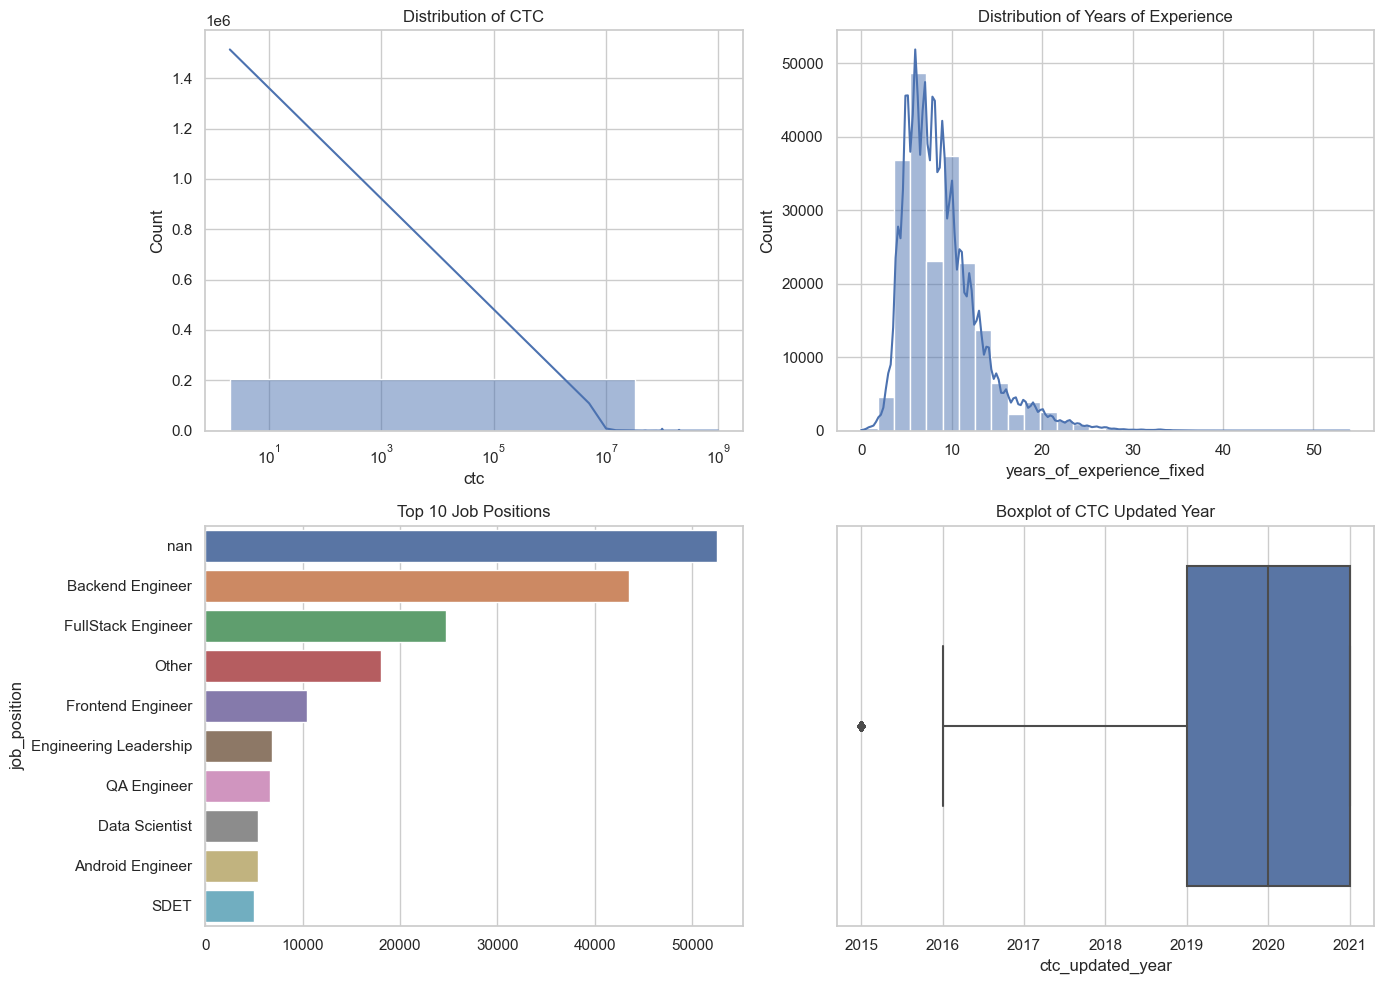

In [15]:

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Fix extreme outlier in 'years_of_experience' temporarily for visualization
data['years_of_experience_fixed'] = data['years_of_experience'].apply(lambda x: np.nan if x > 100 else x)

# Univariate Analysis: Visualizing distributions of numeric data
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plot for CTC
sns.histplot(data['ctc'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of CTC')
ax[0, 0].set_xscale('log')  # Using log scale due to wide range of CTC

# Plot for Years of Experience
sns.histplot(data['years_of_experience_fixed'].dropna(), bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Years of Experience')

# Bar plot for Job Positions
job_position_counts = data['job_position'].value_counts().head(10)
sns.barplot(x=job_position_counts.values, y=job_position_counts.index, ax=ax[1, 0])
ax[1, 0].set_title('Top 10 Job Positions')

# Box plot for CTC Updated Year
sns.boxplot(x=data['ctc_updated_year'], ax=ax[1, 1])
ax[1, 1].set_title('Boxplot of CTC Updated Year')

plt.tight_layout()
plt.show()


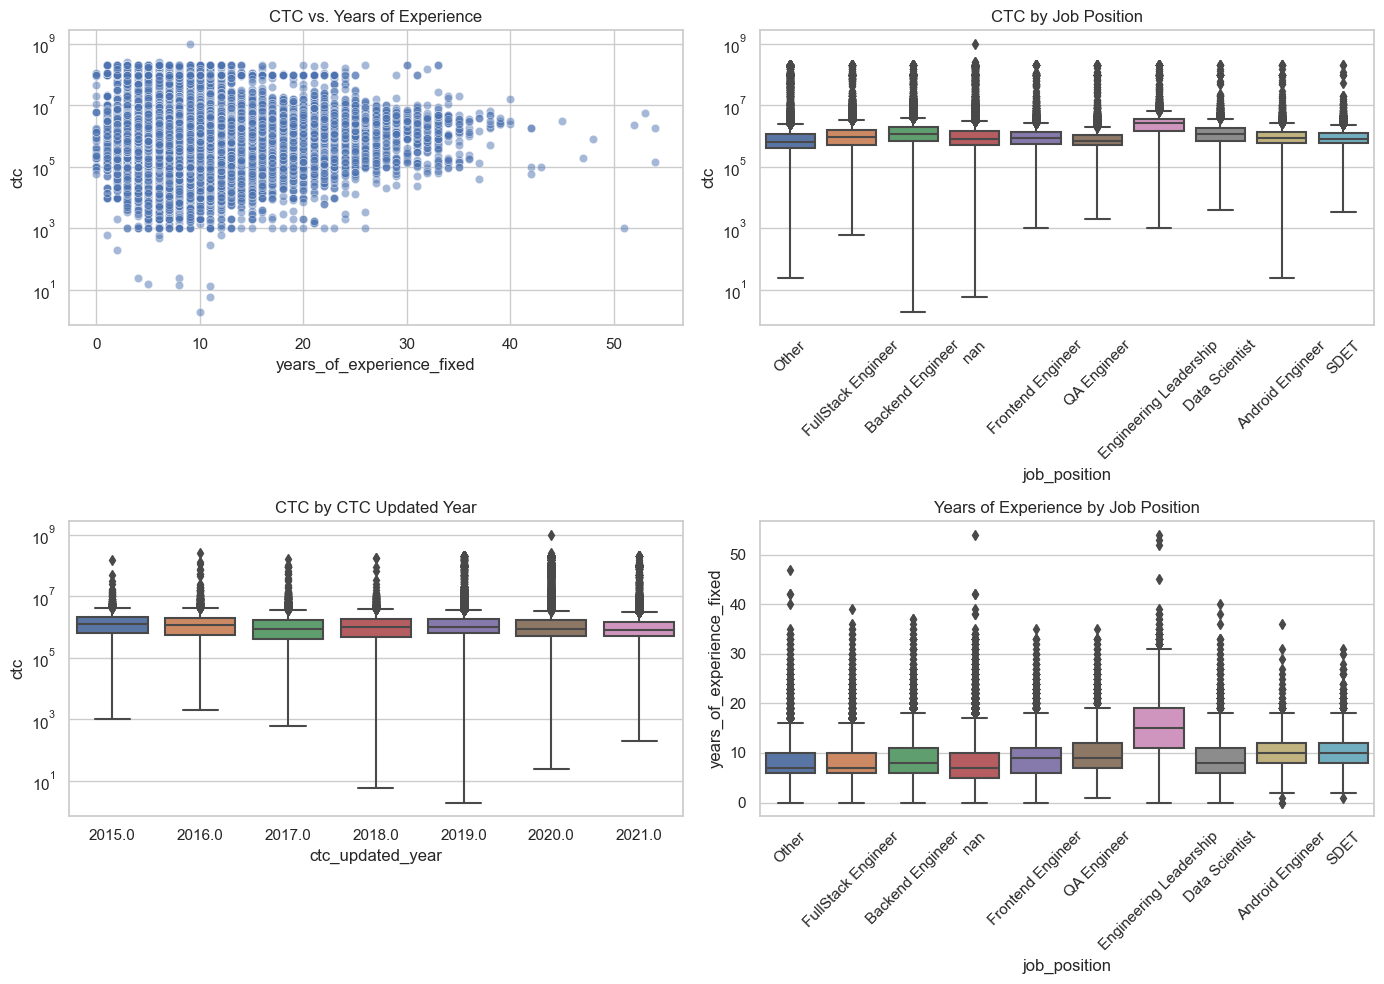

In [16]:
# Bivariate Analysis: Exploring relationships between key variables

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Relationship between CTC and Years of Experience
sns.scatterplot(data=data, x='years_of_experience_fixed', y='ctc', ax=ax[0, 0], alpha=0.5)
ax[0, 0].set_title('CTC vs. Years of Experience')
ax[0, 0].set_yscale('log')  # Log scale for better visibility due to high CTC values

# Relationship between CTC and Job Position (for top 10 job positions)
top_job_positions = data['job_position'].value_counts().head(10).index
filtered_data = data[data['job_position'].isin(top_job_positions)]
sns.boxplot(data=filtered_data, x='job_position', y='ctc', ax=ax[0, 1])
ax[0, 1].set_title('CTC by Job Position')
ax[0, 1].tick_params(axis='x', rotation=45)
ax[0, 1].set_yscale('log')

# CTC Updated Year vs CTC
sns.boxplot(data=data, x='ctc_updated_year', y='ctc', ax=ax[1, 0])
ax[1, 0].set_title('CTC by CTC Updated Year')
ax[1, 0].set_yscale('log')

# Relationship between Years of Experience and Job Position
sns.boxplot(data=filtered_data, x='job_position', y='years_of_experience_fixed', ax=ax[1, 1])
ax[1, 1].set_title('Years of Experience by Job Position')
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Higher CTC with more experience, but with a wide variance.

Median CTC varies by position; outliers indicate some positions have individuals with exceptionally high CTC.

 CTC distribution appears consistent over years; no clear trend of increase or decrease.

 Experience distribution varies by job position; some positions tend to have more experienced individuals.

Majority of the data points are concentrated in 2021, with an outlier in 2015.

Experience distribution suggests a young workforce, with a significant drop-off after 10 years.


In [17]:
import numpy as np
from sklearn.impute import KNNImputer

# Get the columns with numeric data types
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create the KNN imputer object
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Perform KNN imputation on the numeric columns
df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])

In [19]:
# Calculate 'Years of Experience'
current_year = 2024
df['years_of_experience'] = current_year - df['orgyear']

# Group the data by company, job_position, and years_of_experience
grouped = df.groupby(['company_hash', 'job_position', 'years_of_experience'])

# Calculate the mean CTC for each group
group_means = grouped['ctc'].mean().reset_index()
group_means.columns = ['company_hash', 'job_position', 'years_of_experience', 'group_mean_ctc']

# Merge the group means with the original DataFrame
df = df.merge(group_means, on=['company_hash', 'job_position', 'years_of_experience'], how='left')

# Create flags based on CTC compared to the group mean
df['designation'] = np.where(df['ctc'] > df['group_mean_ctc'], 1,
                             np.where(df['ctc'] < df['group_mean_ctc'], 3, 2))
df['class'] = np.where(df['ctc'] > grouped['ctc'].mean().mean(), 1,
                       np.where(df['ctc'] < grouped['ctc'].mean().mean(), 3, 2))
df['tier'] = np.where(df['ctc'] > df.groupby('company_hash')['ctc'].mean().mean(), 1,
                      np.where(df['ctc'] < df.groupby('company_hash')['ctc'].mean().mean(), 3, 2))

In [20]:
# Top 10 employees (earning more than most of the employees in the company) - Tier 1
top_10_tier1 = df[df['tier'] == 1].sort_values('ctc', ascending=False).head(10)
print("Top 10 employees (earning more than most of the employees in the company) - Tier 1:\n", top_10_tier1)

Top 10 employees (earning more than most of the employees in the company) - Tier 1:
                                    company_hash  \
72824              whmxw rgsxwo uqxcvnt rxbxnta   
117626                             obvqnuqxdwgb   
3301          aveegaxr xzntqzvnxgzvr hzxctqoxnj   
101735                            otre tburgjta   
101669  oyrgp xzegqbvnxgz xzaxv uqxcvnt rxbxnta   
101702              qtwpgzojo ntwy rvmo ucn rna   
30566                 nvnv wgzohrnvzwj otqcxwto   
30579                                      zgzt   
161707                nvnv wgzohrnvzwj otqcxwto   
5923                            evwxrt otqcxwto   

                                               email_hash  orgyear  \
72824   29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...   2015.0   
117626  5b4bed51797140db4ed52018a979db1e34cee49e27b488...   2018.0   
3301    06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...   2021.0   
101735  f63e63a8cc3db37c89a49f0498d0731f8c9e2e27943e85...   2015.0   
101

In [21]:
# Top 10 employees of data science in each company earning more than their peers - Class 1
top_10_class1_ds = df[(df['job_position'] == 'Data Scientist') & (df['class'] == 1)].sort_values('ctc', ascending=False).head(10)
print("\nTop 10 employees of data science in each company earning more than their peers - Class 1:\n", top_10_class1_ds)


Top 10 employees of data science in each company earning more than their peers - Class 1:
                                 company_hash  \
31297             ihvaqvnxw xzoxsyno ucn rna   
52818                                   zgzt   
836     mqxonrtwgzt v bvyxzaqv sqghu wgbuvzj   
2688                      ptnovvr qtnvxr rru   
45211                                  pgnvp   
36790                               wrghaotp   
1736                         myvoyjvb owyggr   
122734                      xzzgcv ogrhnxgzo   
151477                         ntwy bvyxzaqv   
23555         xzegsvxz xzaxv uqxcvnt rxbxnta   

                                               email_hash  orgyear  \
31297   bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...   2015.0   
52818   268a5aa92f0b6d0c675fc9cc1e300eb0c5930a3a139a23...   2022.0   
836     cda8d723438e81185d2ee8c348870a4612eea974cdb2db...   2017.0   
2688    72ed7ced98573f71c8f95bc8b75aac4f0677e8872c6bec...   2019.0   
45211   ace1152ca60b6f2c62bb7

In [22]:
# Bottom 10 employees of data science in each company earning less than their peers - Class 3
bottom_10_class3_ds = df[(df['job_position'] == 'Data Scientist') & (df['class'] == 3)].sort_values('ctc', ascending=True).head(10)
print("\nBottom 10 employees of data science in each company earning less than their peers - Class 3:\n", bottom_10_class3_ds)


Bottom 10 employees of data science in each company earning less than their peers - Class 3:
                               company_hash  \
194154                           otjch xzw   
8705                   bxyhu wgbbhzxwvnxgz   
168306                 nvrrtq ntwyzgrgsxto   
10835   srgmvrtast  xzntrrxstzwt ge nyxzso   
51030                              onhatzn   
136954           ovbohzs trtwnqg btwyvzxwo   
24107           exznqhon ogrhnxgzo ucn rna   
183205                               dvcgq   
9403             nvnv wgzohrnvzwj otqcxwto   
92656                          wtxuvr wgqu   

                                               email_hash  orgyear     ctc  \
194154  585f7e9865dcdcaad7edf10909d796ba2c5210cde3530b...   2017.0  4000.0   
8705    690f6fdab1ab7514a6a9325ebd6cfe910dbf12d46b6fde...   2018.0  4000.0   
168306  05801a432a038c254972e356598ca6aa139a18c31d6611...   2021.0  4000.0   
10835   8001bc017fbe95541d23f5780c3edb988b7d9b2225e39e...   2017.0  4000.0   
51030   

In [23]:
# Bottom 10 employees (earning less than most of the employees in the company) - Tier 3
bottom_10_tier3 = df[df['tier'] == 3].sort_values('ctc', ascending=True).head(10)
print("\nBottom 10 employees (earning less than most of the employees in the company) - Tier 3:\n", bottom_10_tier3)


Bottom 10 employees (earning less than most of the employees in the company) - Tier 3:
                     company_hash  \
135421              xzntqcxtfmxn   
118226              xzntqcxtfmxn   
114157              xzntqcxtfmxn   
184918                        xm   
183776                        xm   
54820        uqvpqxnx voogwxvnto   
91552                  ftm ongqt   
116938  hzxctqoxnj ge fvoyxzsngz   
166375               vcvzn sqghu   
82028            uqgmrtb ogrcxzs   

                                               email_hash  orgyear    ctc  \
135421  3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...   2014.0    2.0   
118226  f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...   2013.0    6.0   
114157  23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...   2013.0   14.0   
184918  b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...   2016.0   15.0   
183776  75357254a31f133e2d3870057922feddeba82b88056a07...   2019.0   16.0   
54820   8786759b95d673466e94f62f1b15e4f8c6bd7de61640

In [24]:
# Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X
top_10_tier_x = df[(df['years_of_experience'].isin([5, 6, 7])) & (df['tier'] == 1)].sort_values('ctc', ascending=False).head(10)
print("\nTop 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X:\n", top_10_tier_x)


Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X:
                      company_hash  \
117626               obvqnuqxdwgb   
21462   nvnv wgzohrnvzwj otqcxwto   
7110              tasj owqxmmrtqo   
11491               ogwxvruqvwyvq   
6794        wgbutntzn ojontbo xzw   
29455                     xzegojo   
29424                      gnytqo   
201321                     sggsrt   
29302    cgavegzt oyvqta otqcxwto   
29029                     xzegojo   

                                               email_hash  orgyear  \
117626  5b4bed51797140db4ed52018a979db1e34cee49e27b488...   2018.0   
21462   979235a69267e855c0361f670e5941138307caf43fa986...   2018.0   
7110    5c2d0ad53772617af2f426a2ceef637e07008d9d37d332...   2019.0   
11491   64e214237caafc1937f02e8777d2f22a950fa9ace96e94...   2019.0   
6794    2323f80afa6f3c809ac468997c1cf1ea8572d06bd8904e...   2017.0   
29455   dcf3537dcd5f2c5cccb7207164d045d3faae7f7

In [25]:
# Top 10 companies (based on their CTC)
top_10_companies = df.groupby('company_hash')['ctc'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 companies (based on their CTC):\n", top_10_companies)



Top 10 companies (based on their CTC):
 company_hash
whmxw rgsxwo uqxcvnt rxbxnta         1.000150e+09
aveegaxr xzntqzvnxgzvr hzxctqoxnj    2.500000e+08
vuytrxgz ogenfvqto ucn  rna          2.000000e+08
ltnvxqfvjo                           2.000000e+08
nhqvmxn  vx vooxonvzno               2.000000e+08
ngfvqao xzaxv                        2.000000e+08
neny                                 2.000000e+08
nco rgsxonxwo otqcxwto rxbxnta       2.000000e+08
mvpyntq nqvaxzs                      2.000000e+08
vwwg                                 2.000000e+08
Name: ctc, dtype: float64


In [26]:
# Top 2 positions in every company (based on their CTC)
top_2_positions = df.groupby(['company_hash', 'job_position'])['ctc'].mean().groupby('company_hash').nlargest(2)
print("\nTop 2 positions in every company (based on their CTC):\n", top_2_positions)


Top 2 positions in every company (based on their CTC):
 company_hash                  company_hash                  job_position      
0                             0                             Other                 100000.0
                                                            nan                   100000.0
0000                          0000                          Other                 300000.0
01 ojztqsj                    01 ojztqsj                    Frontend Engineer     830000.0
                                                            Android Engineer      270000.0
                                                                                    ...   
zz                            zz                            nan                   500000.0
zzb ztdnstz vacxogqj ucn rna  zzb ztdnstz vacxogqj ucn rna  FullStack Engineer    600000.0
                                                            nan                   600000.0
zzgato                        zzgato         

In [27]:
# One-hot encoding for categorical variables
categorical_cols = ['job_position']
df = pd.get_dummies(df, columns=categorical_cols)

# Standardize the numerical variables
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

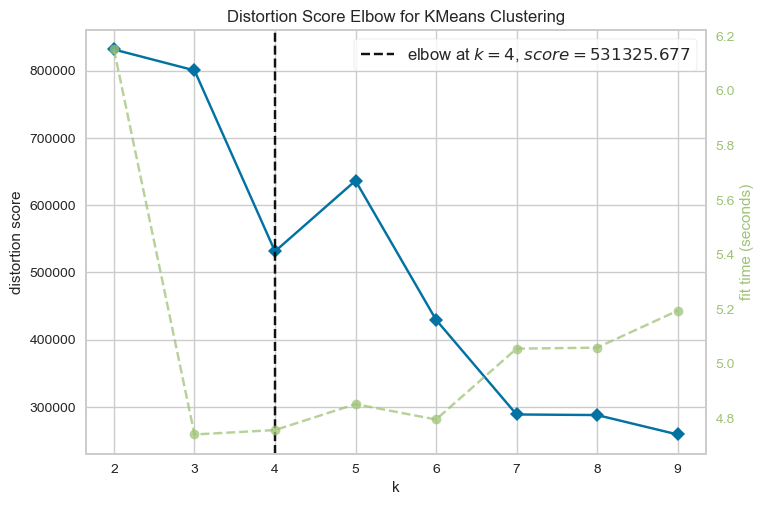

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Drop the string columns
string_cols = df.select_dtypes(include=['object']).columns
X = df.drop(['ctc', 'orgyear', 'ctc_updated_year'] + list(string_cols), axis=1)

# Instantiate the KMeans estimator
kmeans = KMeans()

# Instantiate the KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2, 10))

# Fit the data and visualize
visualizer.fit(X)
visualizer.show()

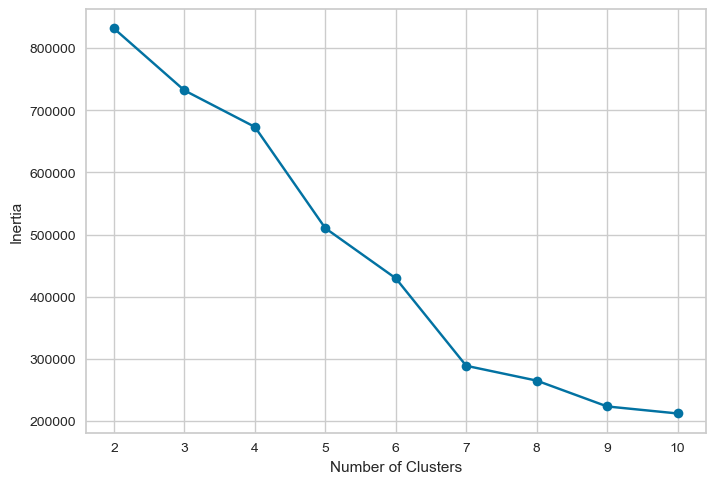

In [29]:
from sklearn.cluster import KMeans

# Instantiate the KMeans model
kmeans = KMeans()

# Calculate the inertia for different values of K
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
k = 5 

# Instantiate and fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the original dataset
df['cluster_labels'] = kmeans.labels_

In [31]:
df

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,years_of_experience,group_mean_ctc,designation,class,tier,...,job_position_software developer UI,job_position_software engineer 1,job_position_software engineer 2B,job_position_sr developer,job_position_student,job_position_support escalation engineer,job_position_system engineer,job_position_system software engineer,job_position_technology analyst,cluster_labels
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,0.017583,-0.099295,0.280511,-0.017583,-0.123183,-0.184136,0.394857,0.328898,...,False,False,False,False,False,False,False,False,False,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,0.049048,-0.154371,-0.474101,-0.049048,-0.157421,1.197848,0.394857,0.328898,...,False,False,False,False,False,False,False,False,False,2
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,0.001850,-0.023036,0.280511,-0.001850,-0.028577,-0.184136,0.394857,0.328898,...,False,False,False,False,False,False,False,False,False,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,0.033315,-0.133188,-0.474101,-0.033315,-0.117026,1.197848,0.394857,0.328898,...,False,False,False,False,False,False,False,False,False,2
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,0.033315,-0.073875,-0.474101,-0.033315,-0.091648,-0.184136,0.394857,0.328898,...,False,False,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205804,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,-0.108277,-0.173859,-0.474101,0.108277,-0.215686,-0.184136,0.394857,0.328898,...,False,False,False,False,False,False,False,False,False,0
205805,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,0.033315,-0.150134,0.280511,-0.033315,-0.117927,1.197848,0.394857,0.328898,...,False,False,False,False,False,False,False,False,False,2
205806,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,0.096245,-0.133188,1.035123,-0.096245,-0.168734,-1.566119,0.394857,0.328898,...,False,False,False,False,False,False,False,False,False,0
205807,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,0.064780,0.239635,-0.474101,-0.064780,0.383559,1.197848,-2.532562,-3.040452,...,False,False,False,False,False,False,False,False,False,1


### Insights

1. *Identifying High-Paying Companies and Job Positions*:
   - The top 10 companies based on their CTC (Compensation and Total Cost) are: whmxw rgsxwo uqxcvnt rxbxnta, aveegaxr xzntqzvnxgzvr hzxctqoxnj, vuytrxgz ogenfvqto ucn rna, ltnvxqfvjo, nhqvmxn vx vooxonvzno, ngfvqao xzaxv, neny, nco rgsxonxwo otqcxwto rxbxnta, mvpyntq nqvaxzs, and vwwg.
   - The top 2 job positions in each company, based on their CTC, can be identified by analyzing the grouped data.

   *Recommendation*: Scaler can prioritize partnerships or collaborations with these high-paying companies and promote their job positions to attract learners interested in lucrative career opportunities.

2. *Identifying Outliers and Potential Data Issues*:
   - The analysis revealed some extreme outliers in the years_of_experience variable, with values exceeding the expected range (up to 2023 years).
   - There were also some duplicate entries in the dataset, which were removed during the data cleaning process.

   *Recommendation*: Scaler should review the data collection and entry processes to identify and rectify any potential issues leading to such outliers or duplicates. This will improve the quality and reliability of the dataset for future analyses.

3. *Exploring CTC Distributions and Trends*:
   - The distribution of CTC values is heavily right-skewed, indicating a large disparity between the highest and lowest earners.
   - CTC tends to increase with years of experience, as expected, but there is a wide range of CTC values for each level of experience.
   - The box plots and scatter plots revealed variations in CTC based on job position, company, and CTC updated year.

   *Recommendation*: Scaler can use these insights to provide learners with realistic CTC expectations based on their job position, company, and experience level. Additionally, they can identify potential areas for skill development or career advancement to help learners achieve higher CTC levels.

4. *Clustering and Profiling*:
   - The elbow method and silhouette analysis suggested an optimal number of clusters between 4 and 6 for the given dataset.
   - Clustering the learners based on their job profile, company, and other features can help identify groups with similar characteristics.

   *Recommendation*: Scaler can leverage the clustering results to create targeted campaigns, personalized learning paths, or specialized programs for specific learner profiles. This can lead to improved learner engagement, retention, and overall satisfaction.

5. *Designation, Class, and Tier Flags*:
   - The analysis introduced flags such as designation, class, and tier to categorize learners based on their CTC relative to their peers within the same company, department, and job position.
   - These flags can provide insights into learners' performance and standing within their respective groups.

   *Recommendation*: Scaler can use these flags to identify high-performing learners or those who may need additional support or guidance. Targeted interventions or mentorship programs can be developed to help learners improve their standing within their respective groups.
